# <font color='blue'>Advanced regression assignment: Surprise Housing</font>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
>1)Which variables are significant in predicting the price of a house, and

>2)How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.
## Business Goal: 

   You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Data Understanding and cleaning

Let's first have a look at the dataset and understand the size, attribute names etc.

In [67]:
# Loading required libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 1000,'display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [68]:
# reading the dataset
housing_price = pd.read_csv("train.csv",encoding='ISO-8859-10')
housing_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [70]:
# Now finding percentage of missing values per column
round(100*(housing_price.isnull().sum()/len(housing_price.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [71]:
# Checking range of values in 'LotFrontage' column
housing_price['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [72]:
# Dropping Id column and columns with highest percentage of misssing values
housing_price = housing_price.drop(['Id','PoolQC','Fence','Alley','MiscFeature'],axis=1)

# Imputing missing values in 'LotFrontage' column with mean values
housing_price['LotFrontage'].fillna(housing_price['LotFrontage'].mean(),inplace=True)

# Now finding percentage of missing values per column
round(100*(housing_price.isnull().sum()/len(housing_price.index)),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

In [73]:
# Replacing NA values in basement related columns by 'no_basement'
housing_price['BsmtQual'].fillna('no_basement',inplace=True)
housing_price['BsmtCond'].fillna('no_basement',inplace=True)
housing_price['BsmtExposure'].fillna('no_basement',inplace=True)
housing_price['BsmtFinType1'].fillna('no_basement',inplace=True)
housing_price['BsmtFinType2'].fillna('no_basement',inplace=True)

# Replacing NA values in garage related columns by 'no_garage' and NA in 'GarageYrBlt' with '2020'
housing_price['GarageType'].fillna('no_garage',inplace=True)
housing_price['GarageYrBlt'].fillna(2020,inplace=True)
housing_price['GarageFinish'].fillna('no_garage',inplace=True)
housing_price['GarageQual'].fillna('no_garage',inplace=True)
housing_price['GarageCond'].fillna('no_garage',inplace=True)

# Replacing NA values in 'FireplaceQu' column by 'no_fireplace'
housing_price['FireplaceQu'].fillna('no_fireplace',inplace=True)

# Now finding percentage of missing values per column
round(100*(housing_price.isnull().sum()/len(housing_price.index)),2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

In [74]:
# Deleting rows which have any missing values
housing_price = housing_price.dropna(how = 'any',axis = 0)

# Lets find percentage of missing values per column
round(100*(housing_price.isnull().sum()/len(housing_price.index)),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

<font color='red'>**Now there are no any missing values present in our data.**

### <font color='black'>Now lets check for unique elements in each columns and their datatypes.

In [75]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 no

In [76]:
# Checking for unique items in each columns
for i in housing_price.columns:
    print(i)
    print(housing_price[i].unique(),'\n')

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotFrontage
[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.          83.          43.         103.
  93.          30.         129.         140.          35.


 126 236  41] 

EnclosedPorch
[  0 272 228 205 176  87 172 102  37 144  64 114 202 128 156  44  77 192
 140 180 183  39 184  40 552  30 126  96  60 150 120 112 252  52 224 234
 244 268 137  24 108 294 177 218 242  91 160 130 169 105  34 248 236  32
  80 115 291 116 158 210  36  84 148 136 240  54 100 189 293 164 216 239
  67  90  56 129  98 143  70 386 154 185 134 196 264 275 230 254  68 194
 318  48  94 138 226 174  19 170 220 214 280 190 330 208 145 259  81  42
 123 162 286 168  20 301 198 221 212  50  99] 

3SsnPorch
[  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304] 

ScreenPorch
[  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40] 

PoolArea
[  0 512 648 576 555 480 519 738] 

MiscVal
[    0   700

<font color='red'>**This tells us that dtype for every variable is correct.**

## <font color='black'>2. Data visualisation :

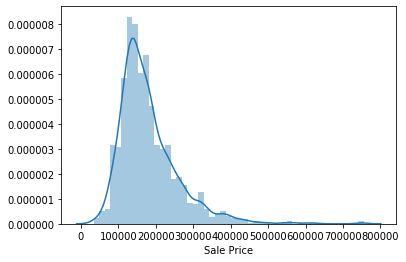

In [77]:
# Plotting distribution of 'SalePrice' of houses

fig = plt.figure()
sns.distplot(housing_price[['SalePrice']])
plt.xlabel('Sale Price')
plt.show()

<font color='red'>**So this suggests that our dataset has more houses with price less than 30000 (i.e. data is skewed)**</font>

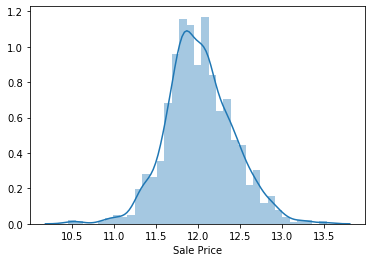

In [78]:
# Using log transformation to make SalePrice variable normally distributed.
housing_price['SalePrice'] = np.log(housing_price['SalePrice'])

# Plotting distribution of 'SalePrice' of houses
fig = plt.figure()
sns.distplot(housing_price[['SalePrice']])
plt.xlabel('Sale Price')
plt.show()

<font color='red'>**Now the target variable has become normally distributed.**</font>

### <font color='blue'> Univariate analysis:</font>

In [79]:
# Defining a function for unvariate graph of categorical variables against SalePrice
# Here we are going to pass a list of variables as an argument

def plot_univariate_graph(x):
    plt.figure(figsize=(20, 12))
    plt.subplot(2,3,1)
    sns.boxplot(x = x[0], y = 'SalePrice', data = housing_price)
    plt.subplot(2,3,2)
    sns.boxplot(x = x[1], y = 'SalePrice', data = housing_price)
    plt.subplot(2,3,3)
    sns.boxplot(x = x[2], y = 'SalePrice', data = housing_price)
    plt.subplot(2,3,4)
    sns.boxplot(x = x[3], y = 'SalePrice', data = housing_price)
    plt.subplot(2,3,5)
    sns.boxplot(x = x[4], y = 'SalePrice', data = housing_price)
    plt.subplot(2,3,6)
    sns.boxplot(x = x[5], y = 'SalePrice', data = housing_price)
    plt.show()


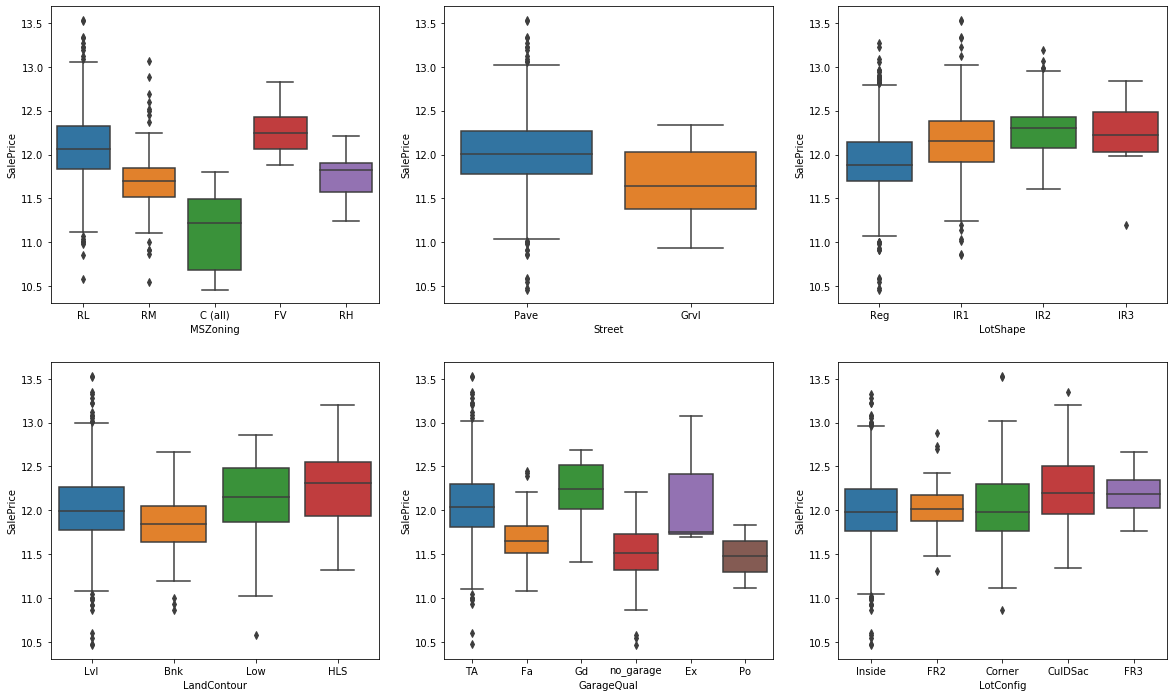

In [80]:
var_list = ['MSZoning','Street','LotShape','LandContour','GarageQual','LotConfig']
plot_univariate_graph(var_list)

<font color='red'>**The above plot shows following things.**</font>
   
   1) SalePrice vs MSZoning - Floating Village and Low Density Residential have higher price range as compared to others
   
   2) SalePrice vs Street - Paved streets have higher price range as compared to gravel
   
   3) SalePrice vs LotShape - With increase in shape of property, price is increasing.
   
   4) SalePrice vs LandContour - Hillside and Low depression properties have higher price range as compared to others
   
   5) SalePrice vs GarageQual - With increase in garage quality, price is increasing.
   
   6) SalePrice vs LotConfig - Cul-de-sac and FR3 have higher price range as compared to others.

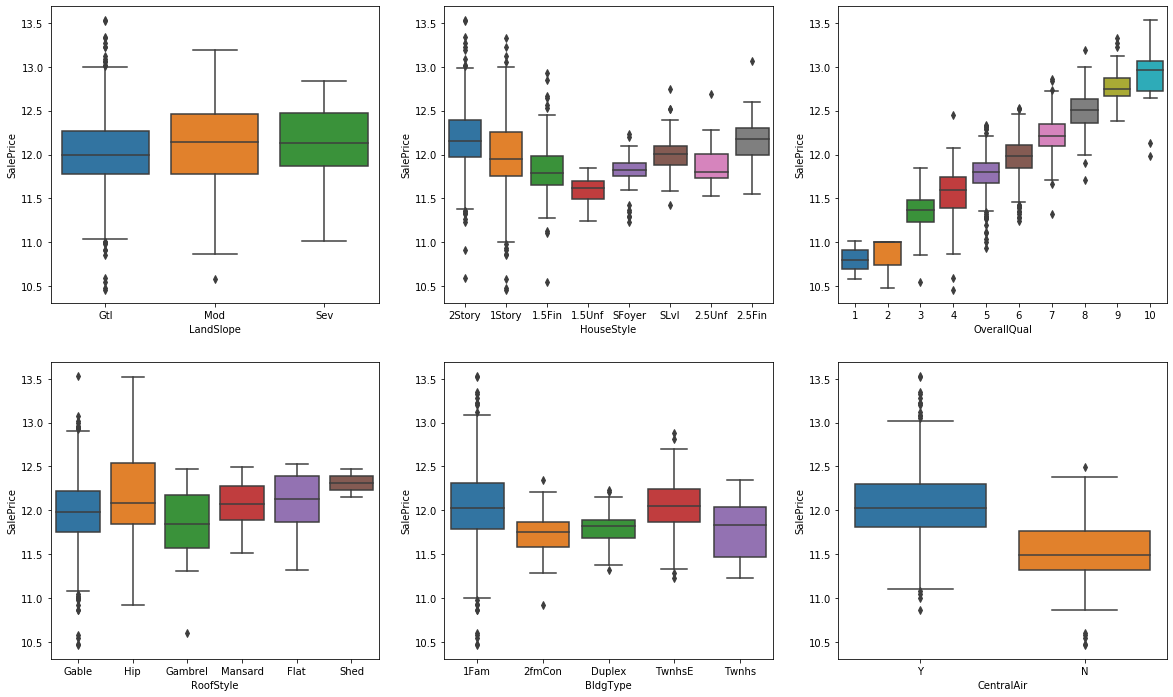

In [81]:
var_list = ['LandSlope','HouseStyle','OverallQual','RoofStyle','BldgType','CentralAir']
plot_univariate_graph(var_list)

<font color='red'>**The above plot shows following things.**</font>
   
   1) SalePrice vs LandSlope - With increase in landslope, price is increasing.
   
   2) SalePrice vs HouseStyle - With increase in HouseStyle, price is increasing.
   
   3) SalePrice vs OverallQual - With increase in OverallQual, price is increasing.
   
   4) SalePrice vs RoofStyle - Shed and flat properties roof style have higher price range as compared to others
   
   5) SalePrice vs BldgType - Single-family Detached houses have higher price range as compared to others
   
   6) SalePrice vs CentralAir - CentralAir houses have higher price range.

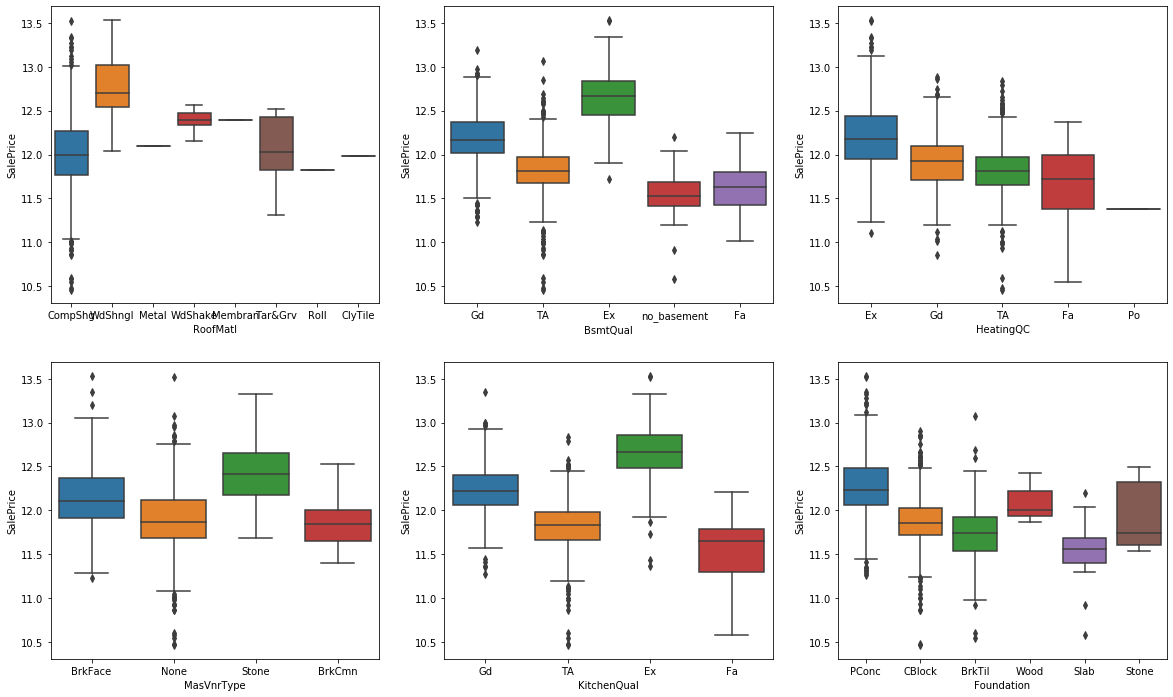

In [82]:
var_list = ['RoofMatl','BsmtQual','HeatingQC','MasVnrType','KitchenQual','Foundation']
plot_univariate_graph(var_list)

<font color='red'>**The above plot shows following things.**</font>
   
   1) SalePrice vs RoofMatl - Roof material Wood Shingles has higher price.
   
   2) SalePrice vs BsmtQual - With increase in basement quality, price is increasing.
   
   3) SalePrice vs HeatingQC - With increase in heating quality, price is increasing.
   
   4) SalePrice vs MasVnrType - stone properties have higher price range as compared to others
   
   5) SalePrice vs KitchenQual - With increase in kitchen quality, price is increasing.
   
   6) SalePrice vs Foundation - Poured Contrete foundation houses have higher price range.

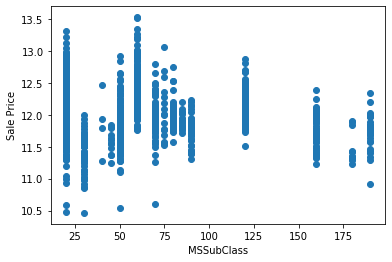

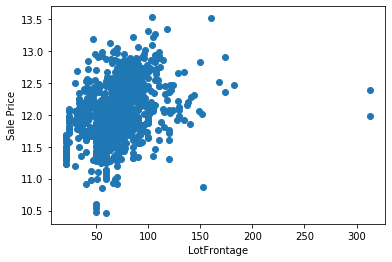

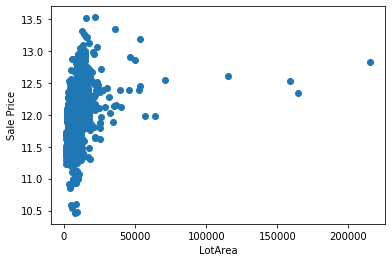

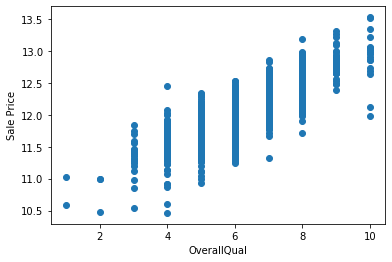

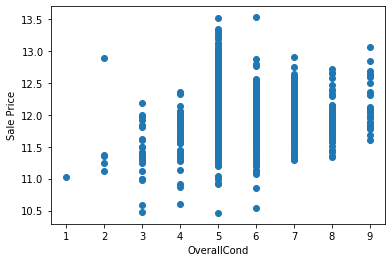

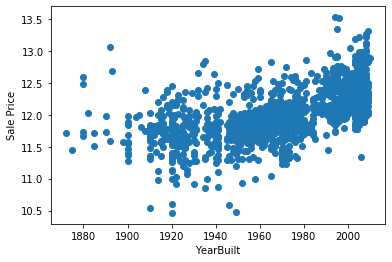

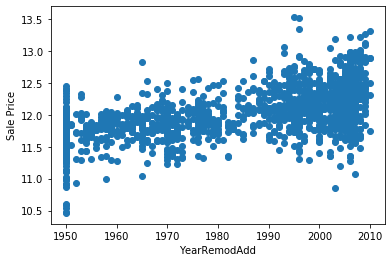

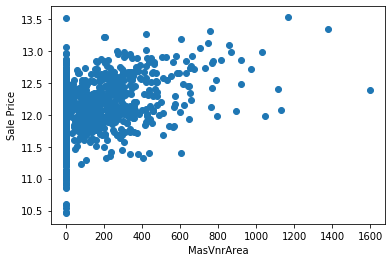

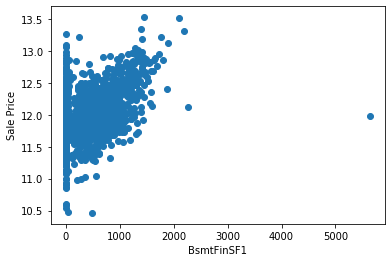

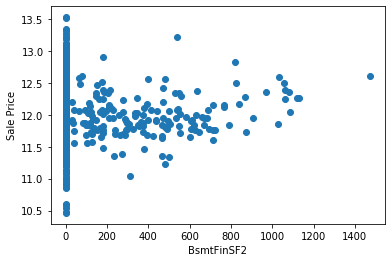

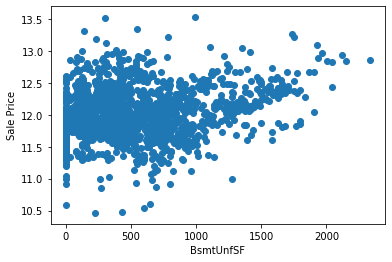

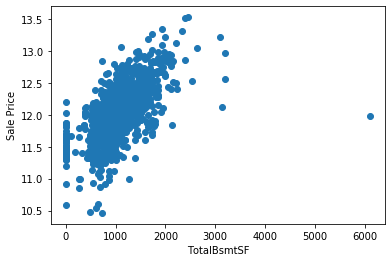

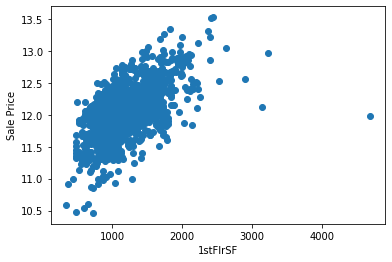

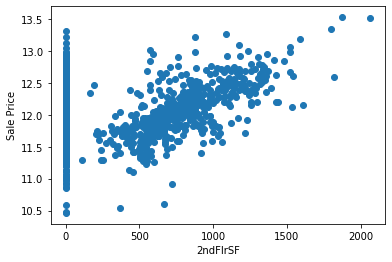

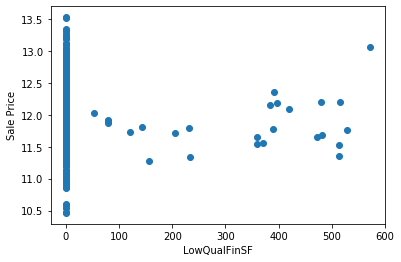

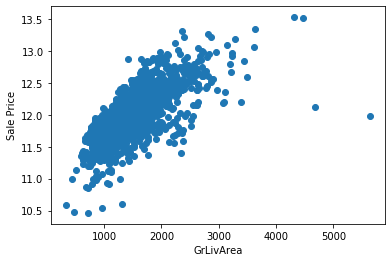

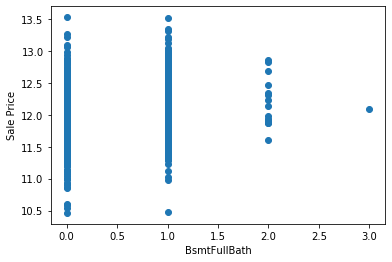

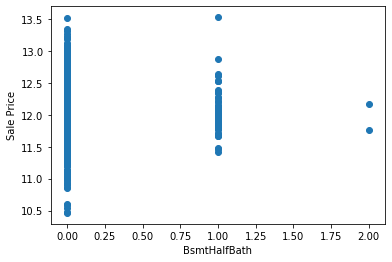

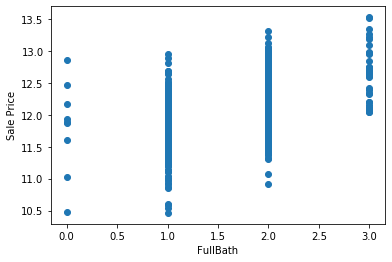

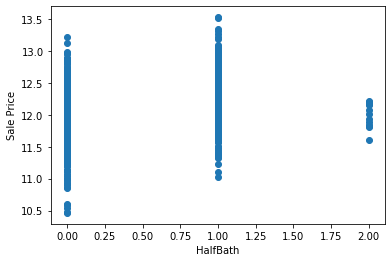

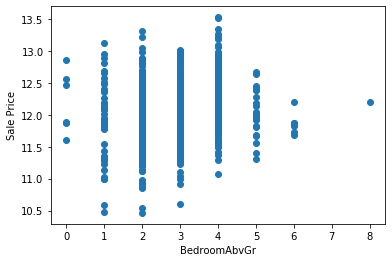

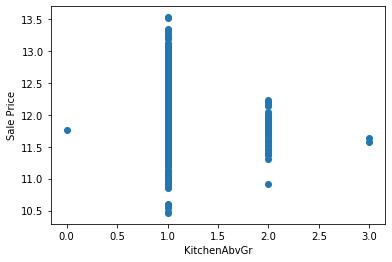

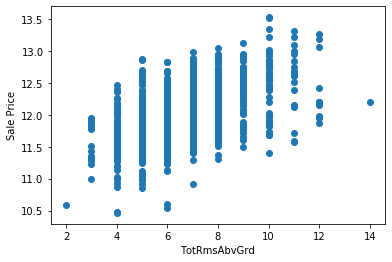

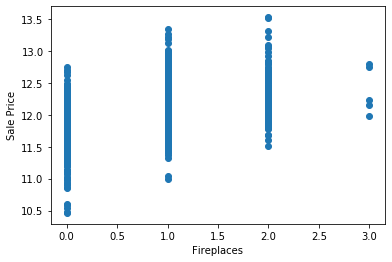

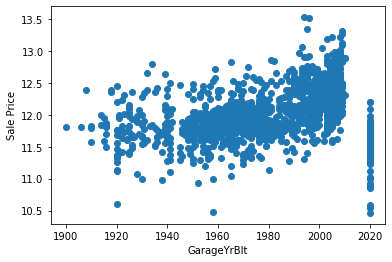

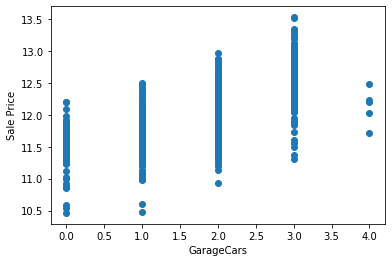

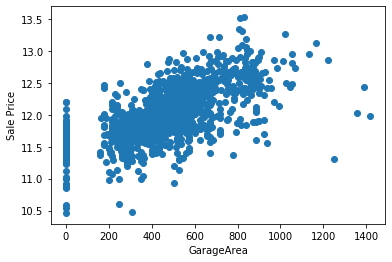

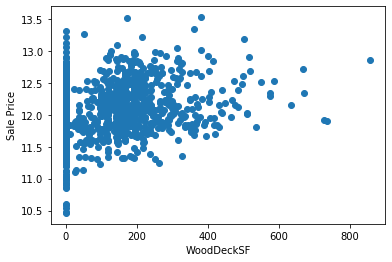

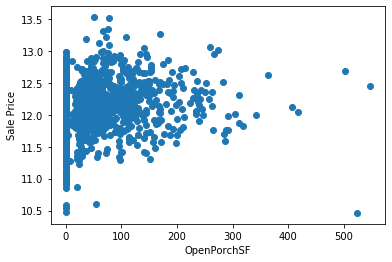

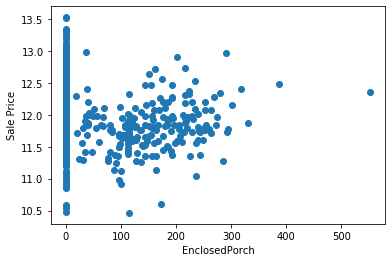

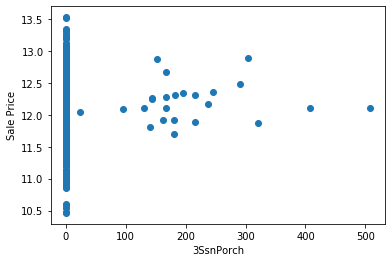

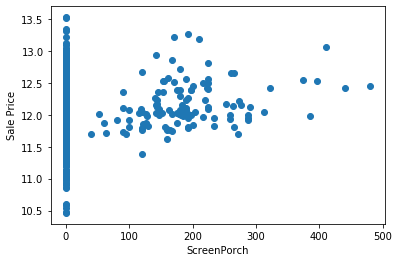

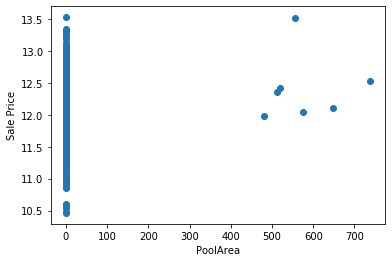

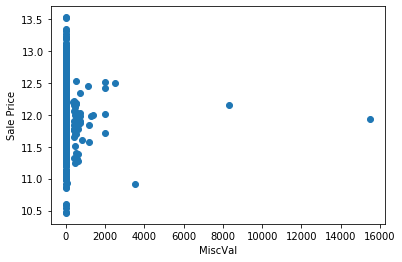

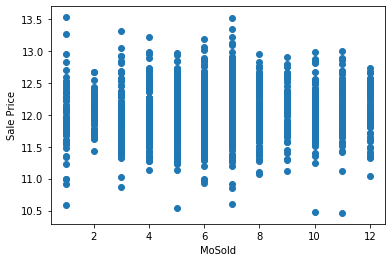

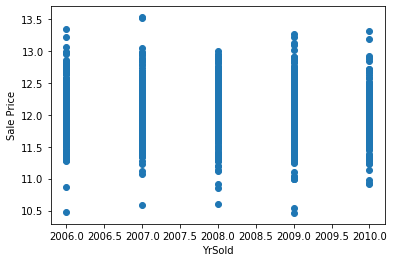

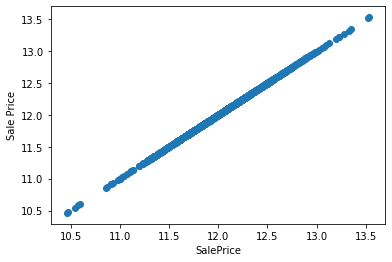

In [83]:
# plot Sale price with all numerical variables

numerical_columns = list(housing_price._get_numeric_data().columns)

plt.figure()
for col in numerical_columns:
    plt.scatter(housing_price[str(col)],housing_price["SalePrice"])
    plt.xlabel(str(col))
    plt.ylabel("Sale Price")
    plt.show()

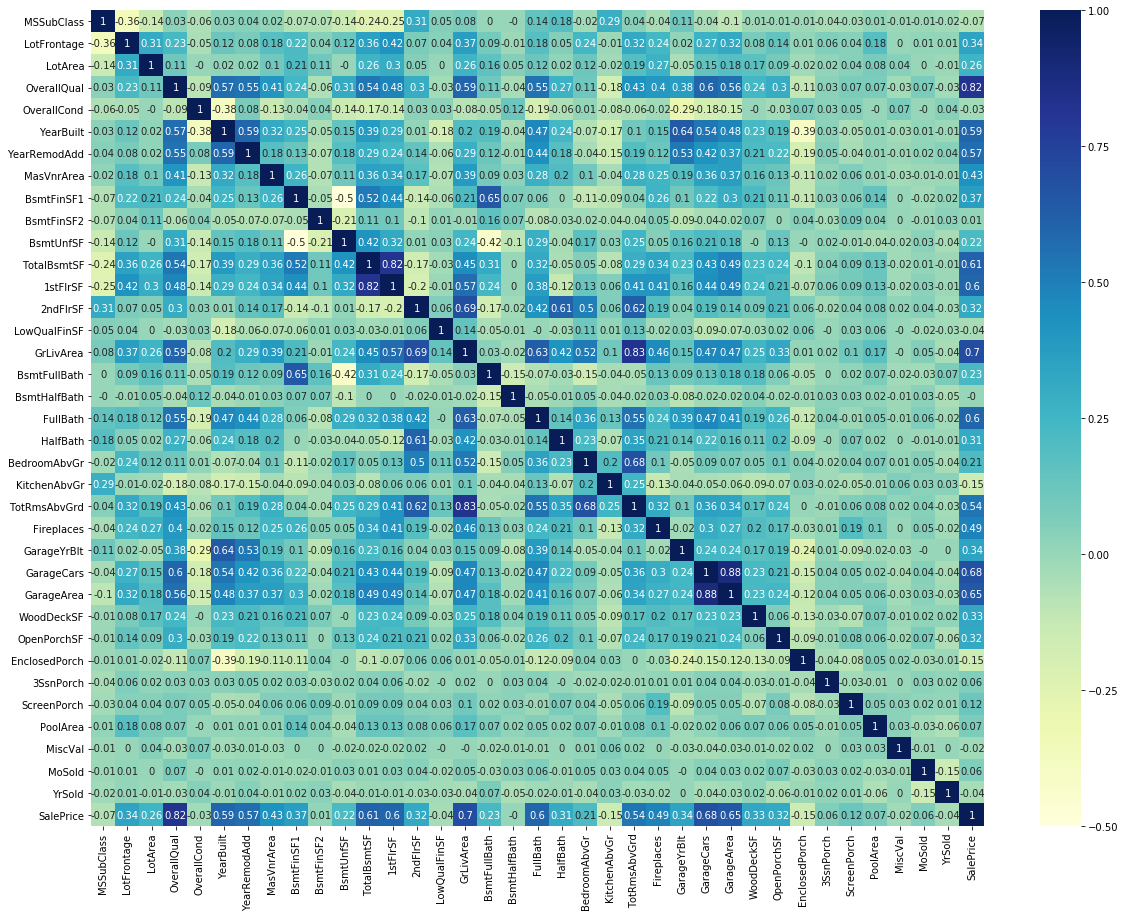

In [84]:
cor = round(housing_price.corr(),2)

# figure size
plt.figure(figsize=(20,15))

# heatmap
ax = sns.heatmap(cor, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<font color='red'>**`OverallQual` and `GrLivArea` have higher correlation with `SalesPprice`.**</font>

### <font color='blue'> Bivariate analysis:</font>

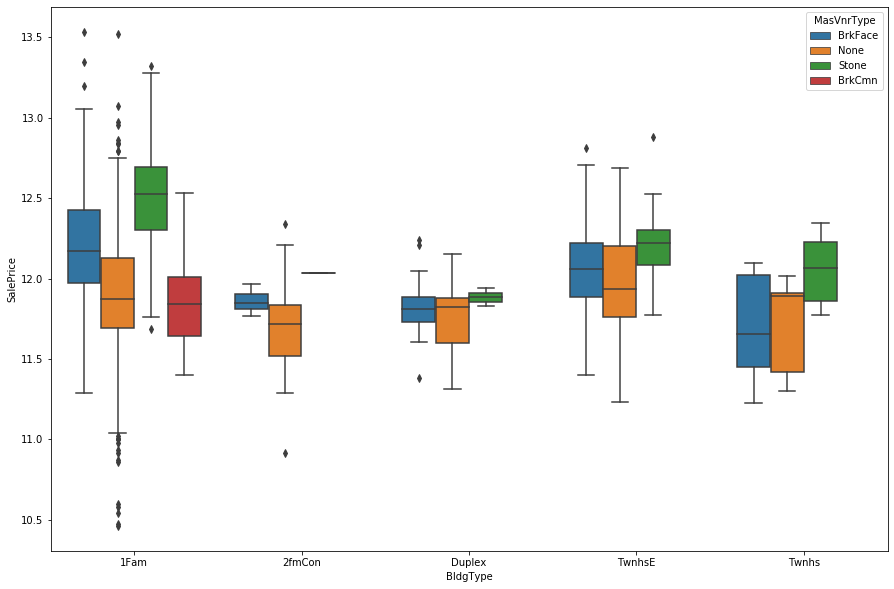

In [85]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'BldgType', y = 'SalePrice', hue = 'MasVnrType', data = housing_price)
plt.show()

<font color='red'>**Stone `MasVnrType` in all `BldgType` have higher `SalesPprice`.**</font>

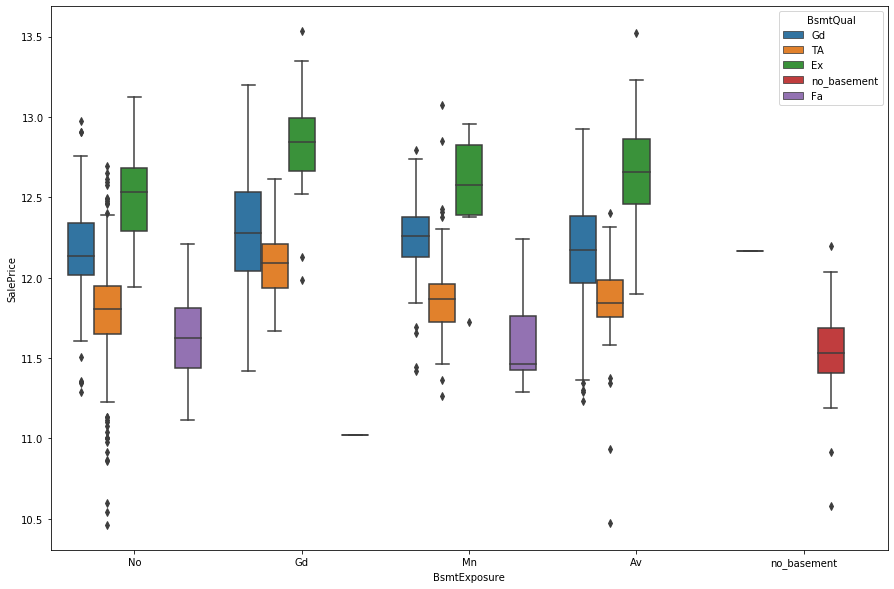

In [86]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', hue = 'BsmtQual', data = housing_price)
plt.show()

<font color='red'>**With increaase in `BsmtExposure` and `BsmtQual`, `SalesPprice` is increasing.**</font>

## 3.Data Preparation:

In [87]:
# Creating 'actual_age' column explaining actual age of a house
housing_price['actual_age'] = housing_price.apply(lambda x: 2020-x.YearBuilt,axis=1)

# Creating 'effective_age' column explaining age of a house since it's remodel date
housing_price['effective_age'] = housing_price.apply(lambda x: 2020-x.YearRemodAdd,axis=1)

# Converting 'GarageYrBlt' column to no. of years
housing_price['GarageYrBlt'] = housing_price.apply(lambda x: 2020-x.GarageYrBlt,axis=1)

# Converting 'YrSold' column to no. of years
housing_price['YrSold'] = housing_price.apply(lambda x: 2020-x.YrSold,axis=1)

# Dropping 'YearBuilt','YearRemodAdd' columns as we have created new columns in place of them
housing_price = housing_price.drop(['YearBuilt','YearRemodAdd'],axis=1)

In [88]:
# Converting ordinal categorical columns to numerical columns

housing_price['LotShape'] = housing_price['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0},regex=True)
housing_price['LandSlope'] = housing_price['LandSlope'].replace({'Gtl':0,'Mod':1,'Sev':2},regex=True)
housing_price['ExterQual'] = housing_price['ExterQual'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},regex=True)
housing_price['ExterCond'] = housing_price['ExterCond'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},regex=True)
housing_price['BsmtQual'] = housing_price['BsmtQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'no_basement': 0},
                                                                regex=True)
housing_price['BsmtCond'] = housing_price['BsmtCond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'no_basement': 0},
                                                                regex=True)
housing_price['BsmtExposure'] = housing_price['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'no_basement':0},regex=True)
housing_price['BsmtFinType1'] = housing_price['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,
                                                                       'no_basement':0},regex=True)
housing_price['BsmtFinType2'] = housing_price['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,
                                                                       'no_basement':0},regex=True)
housing_price['HeatingQC'] = housing_price['HeatingQC'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},regex=True)

housing_price['KitchenQual'] = housing_price['KitchenQual'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},regex=True)

housing_price['FireplaceQu'] = housing_price['FireplaceQu'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,
                                                                     'no_fireplace': 0},regex=True)

housing_price['GarageFinish'] = housing_price['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'no_garage':0},regex=True)

housing_price['GarageQual'] = housing_price['GarageQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,
                                                                     'no_garage': 0},regex=True)

housing_price['GarageCond'] = housing_price['GarageCond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,
                                                                     'no_garage': 0},regex=True)


housing_price['ExterQual'] = housing_price['ExterQual'].astype('int64')
housing_price['KitchenQual'] = housing_price['KitchenQual'].astype('int64')
housing_price['FireplaceQu'] = housing_price['FireplaceQu'].astype('int64')



In [89]:
housing_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,actual_age,effective_age
0,60,RL,65.0,8450,Pave,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,17.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,12,WD,Normal,12.247694,17,17
1,20,RL,80.0,9600,Pave,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,3,Attchd,44.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,13,WD,Normal,12.109011,44,44
2,60,RL,68.0,11250,Pave,2,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,3,Attchd,19.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,12,WD,Normal,12.317167,19,18
3,70,RL,60.0,9550,Pave,2,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,4,Detchd,22.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,14,WD,Abnorml,11.849398,105,50
4,60,RL,84.0,14260,Pave,2,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,3,Attchd,20.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,12,WD,Normal,12.429216,20,20


In [90]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null int64
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null int64
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 non-null object
MasVnrArea       1451 non-null float64
ExterQual        1451 n

In [91]:
y = housing_price.loc[:, 'SalePrice']
X = housing_price.loc[:, housing_price.columns != 'SalePrice']

In [92]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Y,WD,Abnorml
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal


In [93]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_no_garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [94]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [95]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [96]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [97]:
X.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,actual_age,effective_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_no_garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e

In [98]:
X.shape

(1451, 200)

In [99]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [100]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,actual_age,effective_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_no_garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
798,-0.636180,-1.363007,-0.571378,0.702430,-0.226451,-1.516106,1.276154,-0.573097,-0.684753,-0.238892,-0.553903,0.119651,-0.592020,-0.732901,-0.538814,-0.278114,-0.289621,0.976804,0.319099,0.893943,0.089507,-0.794728,-0.120619,-0.605333,1.110846,-0.241851,-1.022285,-0.75859,-1.064044,-0.21037,-0.766644,-0.932885,-0.952520,-1.009193,0.917256,-0.796602,0.313988,-0.151917,0.263411,0.266499,-0.752932,-0.702973,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,0.252243,0.613506,1.825467,-0.253816,-0.211273,-0.105593,-1.934381,2.378227,0.064438,-0.188915,-0.159505,0.338289,-0.026261,-0.261693,-0.182964,-0.052577,0.623311,-0.037152,-0.105593,-0.204051,-0.140274,-0.338289,-0.188915,-0.272065,-0.238348,6.181927,-0.10888,-0.186949,-0.428397,-0.079002,-0.230164,-0.170523,-0.235102,-0.29061,-0.132407,-0.231819,-0.204051,-0.246318,-0.1

## 3. Model Building and Evaluation

### Ridge and Lasso Regression

Let's now try predicting house prices by performing ridge and lasso regression.

### <font color='blue'> Ridge Regression :

In [101]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [102]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017347,0.001354,0.003790,0.001466,0.0001,{'alpha': 0.0001},-0.109899,-0.080575,-0.105275,-0.096884,-0.089831,-0.096493,0.010534,27,-0.058984,-0.062819,-0.059323,-0.061523,-0.060756,-0.060681,0.001415
1,0.022927,0.009366,0.004786,0.001934,0.001,{'alpha': 0.001},-0.109899,-0.080575,-0.105273,-0.096882,-0.089830,-0.096492,0.010533,26,-0.058984,-0.062819,-0.059323,-0.061523,-0.060756,-0.060681,0.001415
2,0.024332,0.004311,0.005395,0.002252,0.01,{'alpha': 0.01},-0.109899,-0.080574,-0.105258,-0.096857,-0.089817,-0.096481,0.010533,25,-0.058986,-0.062821,-0.059323,-0.061526,-0.060756,-0.060682,0.001416
3,0.019945,0.001786,0.003789,0.000746,0.05,{'alpha': 0.05},-0.109899,-0.080571,-0.105187,-0.096746,-0.089759,-0.096433,0.010528,24,-0.058996,-0.062831,-0.059322,-0.061539,-0.060757,-0.060689,0.001418
4,0.019550,0.001191,0.004588,0.001621,0.1,{'alpha': 0.1},-0.109898,-0.080573,-0.105099,-0.096611,-0.089691,-0.096374,0.010521,23,-0.059009,-0.062842,-0.059322,-0.061556,-0.060758,-0.060698,0.001420


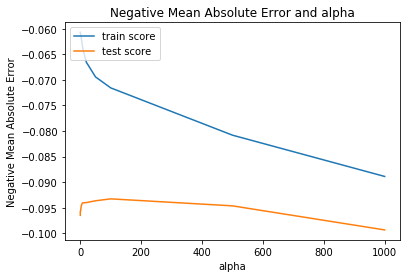

In [103]:
# plot
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
# Getting optimal value of alpha for ridge regression
ridge_model_cv.best_params_

{'alpha': 100}

In [105]:
# model with optimal alpha for ridge regreession
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9289780098631827
0.8801107677836212


In [106]:
# ridge model parameters
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('constant', 12.019),
 ('MSSubClass', -0.008),
 ('LotFrontage', -0.001),
 ('LotArea', 0.014),
 ('LotShape', -0.0),
 ('LandSlope', 0.002),
 ('OverallQual', 0.061),
 ('OverallCond', 0.036),
 ('MasVnrArea', 0.003),
 ('ExterQual', 0.003),
 ('ExterCond', 0.002),
 ('BsmtQual', 0.018),
 ('BsmtCond', 0.004),
 ('BsmtExposure', 0.014),
 ('BsmtFinType1', 0.022),
 ('BsmtFinSF1', 0.004),
 ('BsmtFinType2', -0.001),
 ('BsmtFinSF2', 0.002),
 ('BsmtUnfSF', 0.002),
 ('TotalBsmtSF', 0.007),
 ('HeatingQC', 0.014),
 ('1stFlrSF', 0.036),
 ('2ndFlrSF', 0.03),
 ('LowQualFinSF', 0.007),
 ('GrLivArea', 0.052),
 ('BsmtFullBath', 0.019),
 ('BsmtHalfBath', -0.003),
 ('FullBath', 0.019),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.009),
 ('KitchenAbvGr', -0.012),
 ('KitchenQual', 0.017),
 ('TotRmsAbvGrd', 0.017),
 ('Fireplaces', 0.008),
 ('FireplaceQu', 0.012),
 ('GarageYrBlt', 0.001),
 ('GarageFinish', 0.01),
 ('GarageCars', 0.035),
 ('GarageArea', 0.01),
 ('GarageQual', 0.01),
 ('GarageCond', -0.003),
 ('WoodDeckS

In [107]:
from sklearn.metrics import mean_squared_error

# Checking the mean squared error ridge regression
mean_squared_error(y_test,y_test_pred)

0.018896297050798243

In [108]:
df = pd.DataFrame(list(zip(cols, ridge_model_parameters)),columns=['Features','Coefficients'])
df.iloc[(-df['Coefficients'].abs()).argsort()]

,Features,Coefficients
0,constant,12.019
6,OverallQual,0.061
24,GrLivArea,0.052
120,RoofMatl_CompShg,0.044
100,Condition2_PosN,-0.037
21,1stFlrSF,0.036
7,OverallCond,0.036
37,GarageCars,0.035
22,2ndFlrSF,0.030
199,SaleCondition_Normal,0.028


<font color='red'>**This tells us that top 5 variables in `ridge regression model` predicting house prices are: 1)OverallQual, 2)GrLivArea, 3)RoofMatl_CompShg, 4)Condition2_PosN and 5)1stFlrSF**

### <font color='blue'> Lasso Regression :

In [109]:
lasso = Lasso()

# List of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    8.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [110]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.292414,0.056553,0.002791,0.000400,0.0001,{'alpha': 0.0001},-0.108956,-0.079710,-0.104072,-0.093684,-0.087961,-0.094876,0.010602,10,-0.059351,-0.063156,-0.059433,-0.061968,-0.060866,-0.060955,0.001467
1,0.285635,0.051772,0.003590,0.001352,0.0002,{'alpha': 0.0002},-0.107836,-0.078703,-0.102647,-0.091747,-0.086387,-0.093464,0.010600,9,-0.059681,-0.063586,-0.059658,-0.062440,-0.061132,-0.061300,0.001541
2,0.274466,0.029474,0.002393,0.000798,0.0003,{'alpha': 0.0003},-0.106885,-0.077776,-0.101411,-0.090581,-0.085285,-0.092388,0.010572,8,-0.060013,-0.064073,-0.059946,-0.062829,-0.061454,-0.061663,0.001605
3,0.152394,0.033426,0.002590,0.000485,0.0004,{'alpha': 0.0004},-0.106088,-0.077163,-0.100308,-0.089601,-0.084678,-0.091568,0.010450,7,-0.060407,-0.064565,-0.060299,-0.063248,-0.061805,-0.062065,0.001648
4,0.147605,0.067253,0.003391,0.001492,0.0005,{'alpha': 0.0005},-0.105237,-0.076719,-0.099253,-0.088952,-0.084240,-0.090880,0.010243,5,-0.060807,-0.065056,-0.060705,-0.063678,-0.062182,-0.062486,0.001680


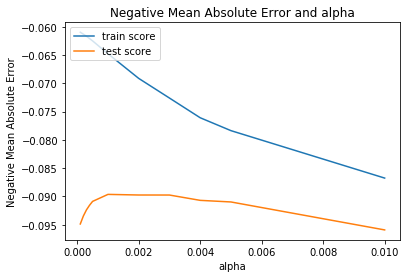

In [111]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [112]:
# Getting optimal value of alpha for lasso regression
lasso_model_cv.best_params_

{'alpha': 0.001}

In [113]:
# model with optimal alpha for lasso regreession
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9466247617734739
0.8088827855007737


In [114]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, lasso_model_parameters))

[('constant', 12.018),
 ('MSSubClass', -0.001),
 ('LotFrontage', 0.007),
 ('LotArea', 0.015),
 ('LotShape', -0.001),
 ('LandSlope', -0.001),
 ('OverallQual', 0.073),
 ('OverallCond', 0.043),
 ('MasVnrArea', 0.001),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.01),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.013),
 ('BsmtFinType1', 0.014),
 ('BsmtFinSF1', 0.018),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.018),
 ('HeatingQC', 0.012),
 ('1stFlrSF', 0.011),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.141),
 ('BsmtFullBath', 0.017),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.003),
 ('HalfBath', 0.005),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.008),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.002),
 ('FireplaceQu', 0.008),
 ('GarageYrBlt', -0.0),
 ('GarageFinish', 0.007),
 ('GarageCars', 0.038),
 ('GarageArea', 0.004),
 ('GarageQual', 0.003),
 ('GarageCond', -0.0),
 ('WoodDeckSF', 0.009),
 ('Op

In [115]:
# Checking the mean squared error for lasso regresion
mean_squared_error(y_test,y_test_pred)

0.030122869167937907

In [116]:
df = pd.DataFrame(list(zip(cols, lasso_model_parameters)),columns=['Features','Coefficients'])
df.iloc[(-df['Coefficients'].abs()).argsort()]

,Features,Coefficients
0,constant,12.018
120,RoofMatl_CompShg,0.251
124,RoofMatl_Tar&Grv,0.164
24,GrLivArea,0.141
126,RoofMatl_WdShngl,0.125
125,RoofMatl_WdShake,0.103
54,MSZoning_RL,0.100
6,OverallQual,0.073
55,MSZoning_RM,0.064
100,Condition2_PosN,-0.055


<font color='red'>**This tells us that top 5 variables in `lasso regression model` predicting house prices are: 1)RoofMatl_CompShg, 2)RoofMatl_Tar&Grv, 3)GrLivArea, 4)RoofMatl_WdShngl and 5)RoofMatl_WdShake**

## <font color='blue'> Code for below subjective questions given in following cells</font>

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Checking models with double the value of optimal alpha for ridge and lasso regreession


### Ridge regression:

In [117]:
alpha = 200                        # As optimal alpha is 100 for ridge regression
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.922140980580816
0.8866412622210322


In [118]:
# ridge model parameters
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

In [119]:
mean_squared_error(y_test,y_test_pred)

0.017866995582296173

In [120]:
df = pd.DataFrame(list(zip(cols, ridge_model_parameters)),columns=['Features','Coefficients'])
df.iloc[(-df['Coefficients'].abs()).argsort()]

,Features,Coefficients
0,constant,12.019
6,OverallQual,0.054
24,GrLivArea,0.043
7,OverallCond,0.032
21,1stFlrSF,0.031
100,Condition2_PosN,-0.031
37,GarageCars,0.030
120,RoofMatl_CompShg,0.024
22,2ndFlrSF,0.024
80,Neighborhood_NridgHt,0.023


<font color='red'>**This tells us that after doubling value of alpha top 5 variables in `ridge regression model` predicting house prices are: 1)OverallQual, 2)GrLivArea, 3)OverallCond, 4)1stFlrSF and 5)Condition2_PosN.
Also `mean squared error` is decreased from 0.018 to 0.017.**

### Lasso regression:

In [121]:
alpha =0.002                     # As optimal alpha is 0.001 for lasso regression

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9354030494238614
0.8565739239398897


In [122]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

In [123]:
mean_squared_error(y_test,y_test_pred)

0.02260604799912936

In [124]:
df = pd.DataFrame(list(zip(cols, lasso_model_parameters)),columns=['Features','Coefficients'])
df.iloc[(-df['Coefficients'].abs()).argsort()]

,Features,Coefficients
0,constant,12.019
120,RoofMatl_CompShg,0.144
24,GrLivArea,0.134
124,RoofMatl_Tar&Grv,0.094
6,OverallQual,0.080
126,RoofMatl_WdShngl,0.073
125,RoofMatl_WdShake,0.056
100,Condition2_PosN,-0.050
37,GarageCars,0.044
7,OverallCond,0.041


<font color='red'>**This tells us that after doubling value of alpha top 5 variables in `lasso regression model` predicting house prices are: 1)RoofMatl_CompShg, 2)GrLivArea, 3)RoofMatl_Tar&Grv, 4)OverallQual and 5)RoofMatl_WdShngl.
Also `mean squared error` is decreased from 0.030 to 0.022.**

### Now creating model by dropping 5 most important predictor variables in lasso regression

In [125]:
X_train = X_train.drop(['RoofMatl_CompShg','RoofMatl_Tar&Grv','GrLivArea','RoofMatl_WdShngl','RoofMatl_WdShake'],axis=1)
X_test =  X_test[X_train.columns]

In [126]:
lasso = Lasso()

# List of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

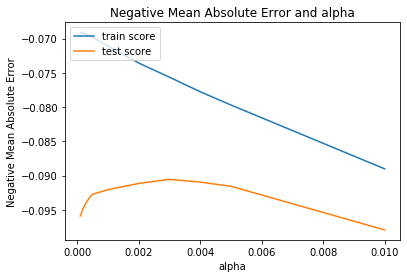

In [127]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [128]:
# Getting optimal value of alpha for lasso regression
lasso_model_cv.best_params_

{'alpha': 0.003}

In [129]:
# model with optimal alpha for lasso regreession
alpha =0.003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9173145532905205
0.8846975360438407


In [130]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

In [131]:
mean_squared_error(y_test,y_test_pred)

0.01817335526573575

In [132]:
df = pd.DataFrame(list(zip(cols, lasso_model_parameters)),columns=['Features','Coefficients'])
df.iloc[(-df['Coefficients'].abs()).argsort()]

,Features,Coefficients
0,constant,12.020
6,OverallQual,0.089
21,1stFlrSF,0.088
22,2ndFlrSF,0.082
36,GarageCars,0.051
99,Condition2_PosN,-0.043
7,OverallCond,0.037
79,Neighborhood_NridgHt,0.024
188,SaleType_New,0.024
14,BsmtFinType1,0.023


<font color='red'>**This tells us that after dropping top 5 variables in `lasso regression model`, the new top 5 variables predicting house prices are:<font color='indigo'> 1)OverallQual, 2)1stFlrSF, 3)2ndFlrSF, 4)GarageCars and 5)Condition2_PosN.</font>
Also `mean squared error` is 0.018.**